In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving fetal-health-classification.zip to fetal-health-classification.zip


In [ ]:
import zipfile

with zipfile.ZipFile('fetal-health-classification.zip', 'r') as zip_ref:
    zip_ref.extractall('data')


In [ ]:
import pandas as pd

df = pd.read_csv('data/fetal_health.csv')


In [ ]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [ ]:
sns.countplot(x = 'fetal_health', data = df, order = df['fetal_health'].value_counts().index)
plt.title('Distribution of labels');

In [ ]:
fetal_health_counts = df['fetal_health'].value_counts()

# Display the counts
print(fetal_health_counts)


In [ ]:
#from ydata_profiling.profile_report import ProfileReport
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#train and test data split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
#X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=50)
#X_train

In [ ]:
!pip install -U imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE,RandomOverSampler,ADASYN
from sklearn.preprocessing import MinMaxScaler
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name=y.name)], axis=1)
scaler = MinMaxScaler()
resampled_data_scaled = pd.DataFrame(scaler.fit_transform(resampled_data.iloc[:, :-1]), columns=X.columns)
resampled_data_scaled_with_target = pd.concat([resampled_data_scaled, pd.Series(y_resampled, name=y.name)], axis=1)

# fetal_health_count = y_train_resampled.value_counts()
# print(fetal_health_count)

In [ ]:
arr = []
for i in resampled_data_scaled_with_target.columns:
  if resampled_data_scaled_with_target.corr()["fetal_health"][i] > 0.01  or resampled_data_scaled_with_target.corr()["fetal_health"][i] < -0.01:
    arr.append(i)
arr

['accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance',
 'histogram_tendency',
 'fetal_health']

In [ ]:
final_resampled_data_scaled_with_target= resampled_data_scaled_with_target[arr]
final_resampled_data_scaled_with_target

,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.813333,0.044118,0.472527,0.047337,0.344633,0.110092,0.034483,0.111111,0.472441,0.587156,0.403670,0.271375,1.000000,2.0
1,0.315789,0.000000,0.400000,0.200000,0.0,0.000000,0.066667,0.279412,0.000000,0.205128,0.717514,0.165138,0.655172,0.333333,0.637795,0.577982,0.577982,0.044610,0.500000,1.0
2,0.157895,0.000000,0.533333,0.200000,0.0,0.000000,0.053333,0.279412,0.000000,0.264300,0.717514,0.165138,0.655172,0.277778,0.637795,0.568807,0.559633,0.048327,0.500000,1.0
3,0.157895,0.000000,0.533333,0.200000,0.0,0.000000,0.053333,0.323529,0.000000,0.453649,0.644068,0.027523,0.413793,0.611111,0.606299,0.559633,0.550459,0.048327,1.000000,1.0
4,0.368421,0.000000,0.533333,0.000000,0.0,0.000000,0.053333,0.323529,0.000000,0.392505,0.644068,0.027523,0.413793,0.500000,0.606299,0.577982,0.559633,0.040892,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,0.000000,0.005523,0.000000,0.000000,0.0,0.000000,0.909314,0.001684,0.741296,0.077149,0.056497,0.796064,0.239405,0.055556,0.671756,0.648225,0.628826,0.003717,0.500000,3.0
4961,0.000000,0.276214,0.225589,0.225589,0.0,0.676768,0.298451,0.340463,0.000000,0.043751,0.802260,0.036697,0.663793,0.568462,0.118110,0.201186,0.054397,0.478240,0.000000,3.0
4962,0.000000,0.007588,0.254996,0.060832,0.0,0.273742,0.826171,0.171595,0.039904,0.148561,0.336300,0.206362,0.112229,0.076039,0.520521,0.453727,0.451318,0.024721,1.000000,3.0
4963,0.000000,0.002302,0.157937,0.196828,0.0,0.221432,0.876348,0.109245,0.034667,0.169248,0.367232,0.164265,0.119869,0.143521,0.485283,0.429226,0.411861,0.027616,0.815473,3.0


In [ ]:
sns.barplot(final_resampled_data_scaled_with_target["fetal_health"].value_counts())


In [ ]:
from sklearn.utils import shuffle

# Assuming you have a DataFrame named 'df'
final_df = shuffle(final_resampled_data_scaled_with_target, random_state=42)
final_df

,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
3137,0.000000,0.000608,0.000000,0.000000,0.0,0.0,0.716102,0.048416,0.307692,0.274344,0.508475,0.201835,0.370690,0.222222,0.661417,0.651376,0.633028,0.008522,1.000000,2.0
393,0.000000,0.000000,0.133333,0.000000,0.0,0.0,0.453333,0.102941,0.000000,0.232742,0.638418,0.165138,0.534483,0.277778,0.708661,0.678899,0.660550,0.014870,1.000000,1.0
1164,0.578947,0.000000,1.000000,0.000000,0.0,0.0,0.186667,0.191176,0.000000,0.059172,0.327684,0.541284,0.413793,0.111111,0.748031,0.715596,0.706422,0.040892,1.000000,1.0
4332,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.797933,0.014706,0.784167,0.078187,0.050409,0.773226,0.208656,0.055556,0.621437,0.607377,0.583150,0.002382,0.500000,3.0
731,0.421053,0.062370,0.333333,0.000000,0.0,0.0,0.440000,0.088235,0.000000,0.171598,0.231638,0.605505,0.327586,0.111111,0.732283,0.633028,0.642202,0.100372,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.000000,0.011028,0.127534,0.000000,0.0,0.0,0.801740,0.014066,0.817967,0.089271,0.071235,0.792582,0.258621,0.002417,0.707976,0.688073,0.669326,0.000000,0.978251,3.0
466,0.000000,0.002079,0.066667,0.000000,0.0,0.0,0.946667,0.014706,0.340659,0.114398,0.197740,0.752294,0.413793,0.111111,0.661417,0.651376,0.623853,0.000000,0.000000,3.0
3092,0.000000,0.021427,0.419282,0.047385,0.0,0.0,0.489149,0.072557,0.314049,0.176747,0.266284,0.494199,0.275862,0.241966,0.674888,0.630981,0.621807,0.013549,1.000000,2.0
3772,0.000000,0.622912,0.160343,0.160343,0.0,0.8,0.327931,0.320740,0.000000,0.000000,0.649082,0.036697,0.430065,0.322794,0.118110,0.134016,0.001858,0.333258,0.000000,3.0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,:-1],final_df.iloc[:,-1],test_size=0.2)

KNN calculates the average of the target values of the K nearest neighbors and assigns this value to the input data point.KNN works based on the idea that objects or data points with similar attributes are more likely to belong to the same class.

Accuracy of KNeighborsClassifier: 95.06545820745217
Precision: 0.9534
Recall: 0.9507
F1 Score: 0.9508
Classification Report:
               precision    recall  f1-score   support

      Normal       1.00      0.90      0.95       316
   Suspected       0.90      0.97      0.94       344
Pathological       0.96      0.98      0.97       333

    accuracy                           0.95       993
   macro avg       0.95      0.95      0.95       993
weighted avg       0.95      0.95      0.95       993



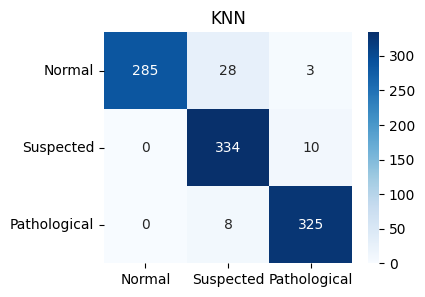

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
knc = KNeighborsClassifier(n_neighbors=7)
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)
print(f"Accuracy of KNeighborsClassifier: {accuracy_score(y_test,y_pred)*100}")
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

report = classification_report(y_test, y_pred,target_names=["Normal", "Suspected", "Pathological"])
print("Classification Report:\n", report)
labels = ["Normal", "Suspected", "Pathological"]
conf_matrix_1 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_1, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('KNN')
plt.show()

The tree is constructed in a recursive, top-down manner. At each internal node, a decision or test is made based on one of the input features. Depending on the outcome of the test, the tree traverses along different branches to subsequent nodes.When constructing the tree, the algorithm selects the best feature and test condition at each node based on a splitting criterion mean squared error for regression.

Accuracy of DecisionTree: 95.56898288016113
Classification Report:
               precision    recall  f1-score   support

      Normal       0.95      0.92      0.94       316
   Suspected       0.93      0.95      0.94       344
Pathological       0.99      0.99      0.99       333

    accuracy                           0.96       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.96      0.96      0.96       993



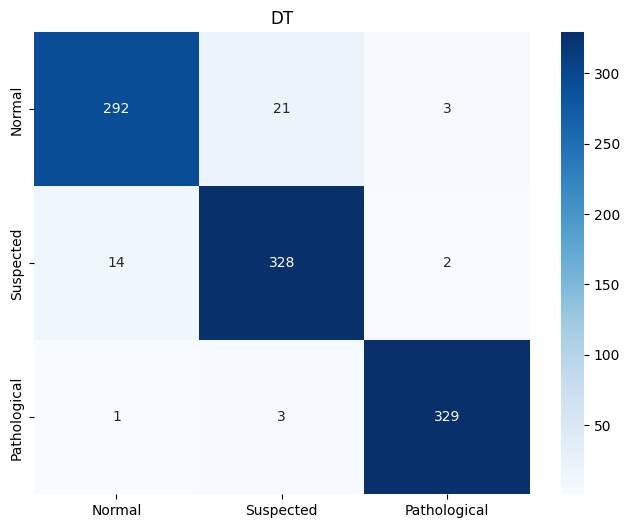

In [ ]:
#DT
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=40)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of DecisionTree: {accuracy*100}")
report = classification_report(y_test, y_pred,target_names=["Normal", "Suspected", "Pathological"])
print("Classification Report:\n", report)
labels = ["Normal", "Suspected", "Pathological"]
conf_matrix_2 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('DT')
plt.show()

SVMs can handle non-linearly separable data through the use of the kernel trick. Kernels transform the original feature space into a higher-dimensional space, where the data becomes linearly separable. Common kernels include the polynomial kernel and radial basis function (RBF) kernel.

Accuracy of Linear SVC: 88.51963746223565
Classification Report:
               precision    recall  f1-score   support

      Normal       0.96      0.87      0.91       316
   Suspected       0.82      0.90      0.86       344
Pathological       0.90      0.88      0.89       333

    accuracy                           0.89       993
   macro avg       0.89      0.88      0.89       993
weighted avg       0.89      0.89      0.89       993



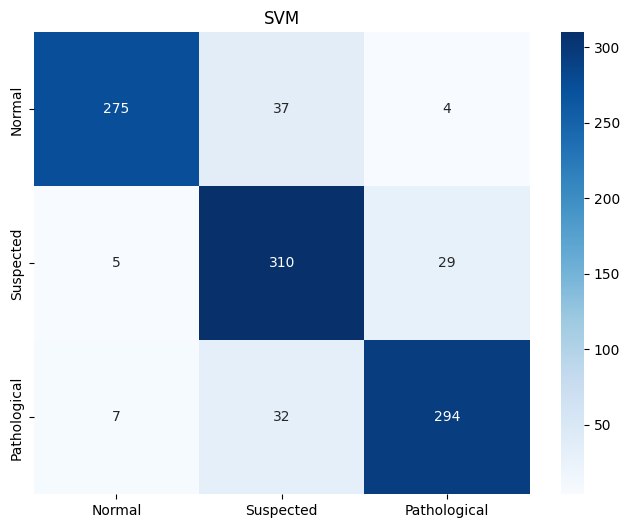

In [ ]:
#SVM
from sklearn.svm import SVC
svc_model = SVC(kernel = 'linear', random_state=5)
svc_model.fit(X_train,y_train)
y_pred = svc_model.predict(X_test)
print(f"Accuracy of Linear SVC: {accuracy_score(y_test,y_pred)*100}")
report = classification_report(y_test, y_pred,target_names=["Normal", "Suspected", "Pathological"])
print("Classification Report:\n", report)
labels = ["Normal", "Suspected", "Pathological"]
conf_matrix_3 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_3, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('SVM')
plt.show()

PCA aims to reduce the dimensionality of a dataset while preserving as much of the important information as possible. It does so by transforming the original variables into a new set of variables called principal components.These components are ordered by their ability to explain the variance in the data.

Accuracy of PCA: 87.41188318227593
Classification Report:
               precision    recall  f1-score   support

      Normal       0.95      0.87      0.91       316
   Suspected       0.83      0.86      0.84       344
Pathological       0.86      0.90      0.88       333

    accuracy                           0.87       993
   macro avg       0.88      0.87      0.88       993
weighted avg       0.88      0.87      0.87       993



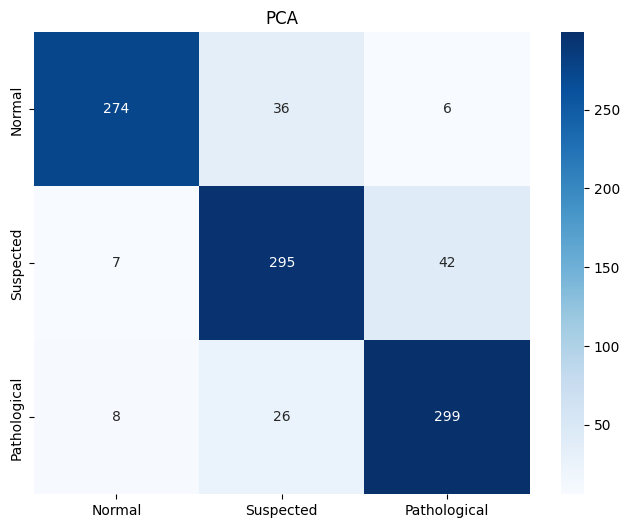

In [ ]:
#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
svm_classifier = SVC(kernel='linear', C=3.7)
svm_classifier.fit(X_train_pca, y_train)
y_pred = svm_classifier.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of PCA: {accuracy*100}")
report = classification_report(y_test, y_pred,target_names=["Normal", "Suspected", "Pathological"])
print("Classification Report:\n", report)
labels = ["Normal", "Suspected", "Pathological"]
conf_matrix_4 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_4, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('PCA')
plt.show()

Each decision tree in a Random Forest is trained on a random subset of the training data and a random subset of the features. This randomness helps reduce overfitting.Random Forest selects a random subset of features for each decision tree. This means that different trees in the forest are exposed to different subsets of data and features.

Accuracy of RandomForestClassifier: 98.38872104733132
Classification Report:
               precision    recall  f1-score   support

      Normal       0.99      0.97      0.98       316
   Suspected       0.97      0.99      0.98       344
Pathological       0.99      0.99      0.99       333

    accuracy                           0.98       993
   macro avg       0.98      0.98      0.98       993
weighted avg       0.98      0.98      0.98       993



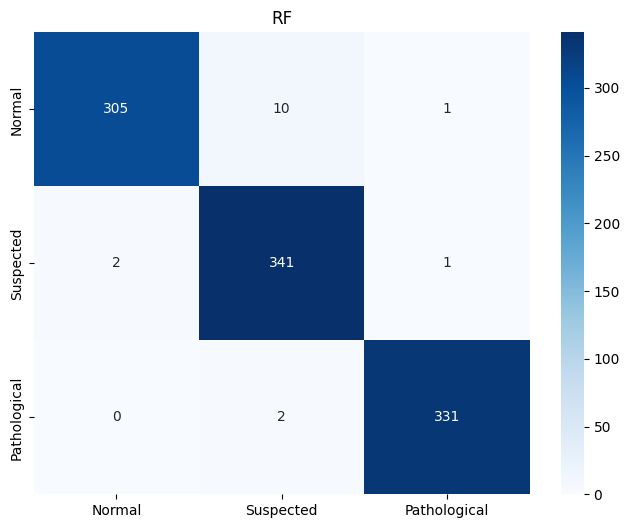

In [ ]:
#RF
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=120, random_state = 110)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(f"Accuracy of RandomForestClassifier: {accuracy_score(y_test,y_pred)*100}")
report = classification_report(y_test, y_pred,target_names=["Normal", "Suspected", "Pathological"])
print("Classification Report:\n", report)
labels = ["Normal", "Suspected", "Pathological"]
conf_matrix_5 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_5, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('RF')
plt.show()

AdaBoost assigns weights to each data point in the training set. Initially, all data points have equal weights. As the algorithm progresses, it assigns higher weights to the data points that are misclassified by the current model.AdaBoost combines the weak learners by taking a weighted sum of their predictions. The final model gives more weight to the learners that performed well during training.

Accuracy of AdaBoostClassifier: 90.4330312185297
Classification Report:
               precision    recall  f1-score   support

      Normal       0.89      0.85      0.87       316
   Suspected       0.85      0.90      0.88       344
Pathological       0.98      0.96      0.97       333

    accuracy                           0.90       993
   macro avg       0.91      0.90      0.90       993
weighted avg       0.91      0.90      0.90       993



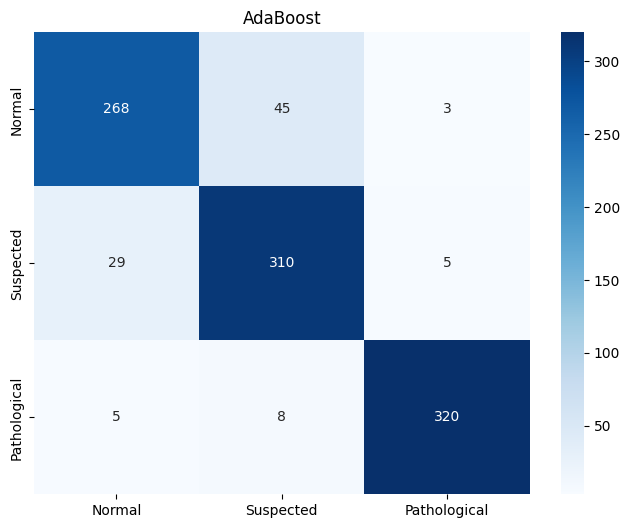

In [ ]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
abc = AdaBoostClassifier(n_estimators=30,learning_rate=1)
abc.fit(X_train,y_train)
y_pred = abc.predict(X_test)
print(f"Accuracy of AdaBoostClassifier: {accuracy_score(y_test,y_pred)*100}")
report = classification_report(y_test, y_pred,target_names=["Normal", "Suspected", "Pathological"])
print("Classification Report:\n", report)
labels = ["Normal", "Suspected", "Pathological"]
conf_matrix_8 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_8, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('AdaBoost')
plt.show()

The "gradient" in Gradient Boosting refers to the technique of using gradient descent to minimize a loss function. In each iteration, the model calculates the gradient of the loss function with respect to the current predictions and adjusts the model's parameters to minimize the loss.

Accuracy of Gradient Boosting Classifier: 98.28801611278952
Classification Report:
               precision    recall  f1-score   support

      Normal       0.99      0.97      0.98       316
   Suspected       0.97      0.99      0.98       344
Pathological       0.99      0.99      0.99       333

    accuracy                           0.98       993
   macro avg       0.98      0.98      0.98       993
weighted avg       0.98      0.98      0.98       993



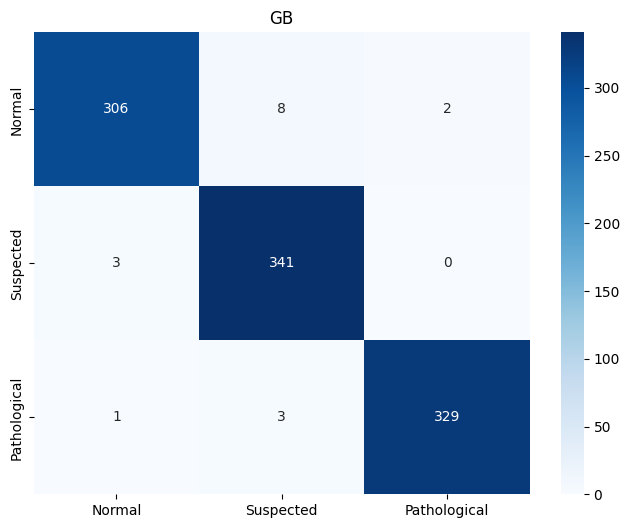

In [ ]:
#GB
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=3, n_estimators=550, max_depth = 12)
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)
print(f"Accuracy of Gradient Boosting Classifier: {accuracy_score(y_test,y_pred)*100}")
report = classification_report(y_test, y_pred,target_names=["Normal", "Suspected", "Pathological"])
print("Classification Report:\n", report)
labels = ["Normal", "Suspected", "Pathological"]
conf_matrix_6 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_6, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('GB')
plt.show()

 SGD minimizes an objective function, often referred to as a loss function or cost function, which measures the difference between the model's predictions and the actual target values. The goal is to find the model parameters that minimize this function.

Accuracy of Stoichastic Gradient Descent: 87.8147029204431
Classification Report:
               precision    recall  f1-score   support

      Normal       0.95      0.86      0.91       316
   Suspected       0.82      0.88      0.85       344
Pathological       0.88      0.89      0.89       333

    accuracy                           0.88       993
   macro avg       0.88      0.88      0.88       993
weighted avg       0.88      0.88      0.88       993



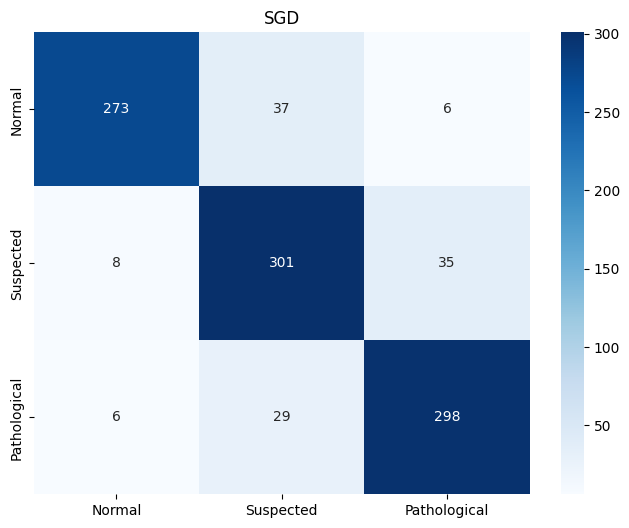

In [ ]:
#SGD
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
sgd_classifier = SGDClassifier(loss='log_loss', max_iter=1000, random_state=55)
sgd_classifier.fit(X_train_scaled, y_train)
y_pred = sgd_classifier.predict(X_test_scaled)
print(f"Accuracy of Stoichastic Gradient Descent: {accuracy_score(y_test, y_pred)*100}")
report = classification_report(y_test, y_pred,target_names=["Normal", "Suspected", "Pathological"])
print("Classification Report:\n", report)
labels = ["Normal", "Suspected", "Pathological"]
conf_matrix_7 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_7, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('SGD')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of MLP Classifier: 93.86%
Classification Report:
               precision    recall  f1-score   support

      Normal       0.95      0.86      0.91       316
   Suspected       0.82      0.88      0.85       344
Pathological       0.88      0.89      0.89       333

    accuracy                           0.88       993
   macro avg       0.88      0.88      0.88       993
weighted avg       0.88      0.88      0.88       993



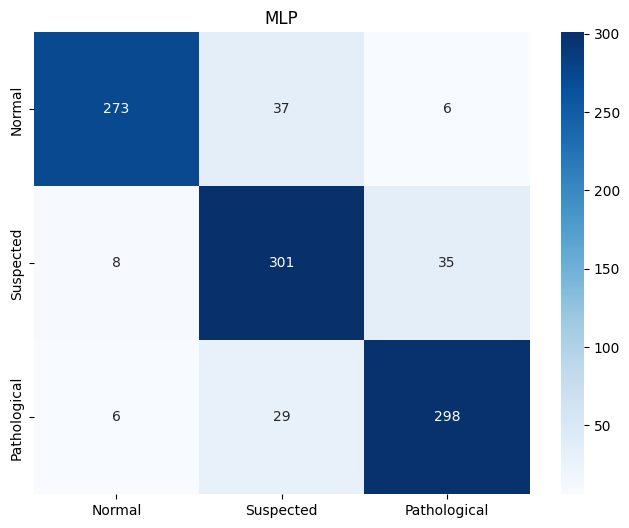

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=30)
mlp_classifier.fit(X_train, y_train)
y_pred_mlp = mlp_classifier.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Accuracy of MLP Classifier: {accuracy_mlp * 100:.2f}%")

report = classification_report(y_test, y_pred,target_names=["Normal", "Suspected", "Pathological"])
print("Classification Report:\n", report)
labels = ["Normal", "Suspected", "Pathological"]
conf_matrix_9 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_9, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('MLP')
plt.show()

Accuracy of GMMClassifier: 91.44%
Classification Report:
               precision    recall  f1-score   support

      Normal       0.84      0.95      0.89       316
   Suspected       0.93      0.83      0.88       344
Pathological       0.98      0.96      0.97       333

    accuracy                           0.91       993
   macro avg       0.92      0.92      0.91       993
weighted avg       0.92      0.91      0.91       993



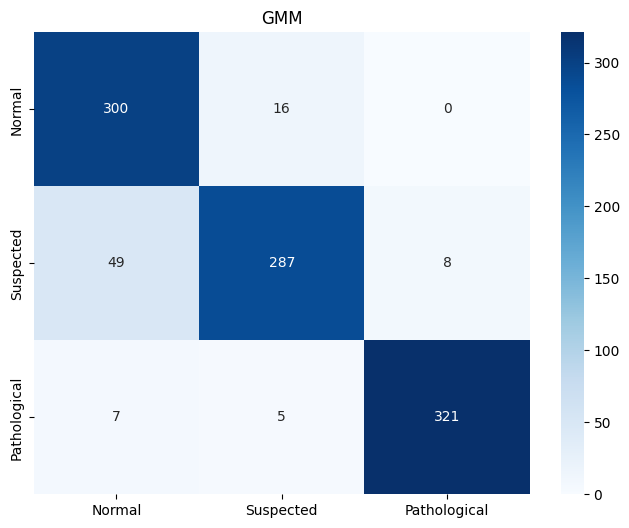

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

class GMMClassifier:
    def __init__(self, n_components=5, random_state=30):
        self.n_components = n_components
        self.random_state = random_state
        self.models = []

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        for label in self.classes_:
            gmm = GaussianMixture(n_components=self.n_components, random_state=self.random_state)
            gmm.fit(X[y == label])
            self.models.append(gmm)

    def predict(self, X):
        likelihoods = np.array([model.score_samples(X) for model in self.models]).T
        return self.classes_[np.argmax(likelihoods, axis=1)]

gmm_classifier = GMMClassifier()
gmm_classifier.fit(X_train, y_train)
y_pred = gmm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of GMMClassifier: {accuracy * 100:.2f}%")
report = classification_report(y_test, y_pred,target_names=["Normal", "Suspected", "Pathological"])
print("Classification Report:\n", report)
labels = ["Normal", "Suspected", "Pathological"]
conf_matrix_10 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_10, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('GMM')
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4599
[LightGBM] [Info] Number of data points in the train set: 3972, number of used features: 19
[LightGBM] [Info] Start training from score -1.087347
[LightGBM] [Info] Start training from score -1.108480
[LightGBM] [Info] Start training from score -1.100124
Accuracy of LightGBM Classifier: 98.79%
Classification Report:
               precision    recall  f1-score   support

      Normal       0.84      0.95      0.89       316
   Suspected       0.93      0.83      0.88       344
Pathological       0.98      0.96      0.97       333

    accuracy                           0.91       993
   macro avg       0.92      0.92      0.91       993
weighted avg       0.92      0.91      0.91       993



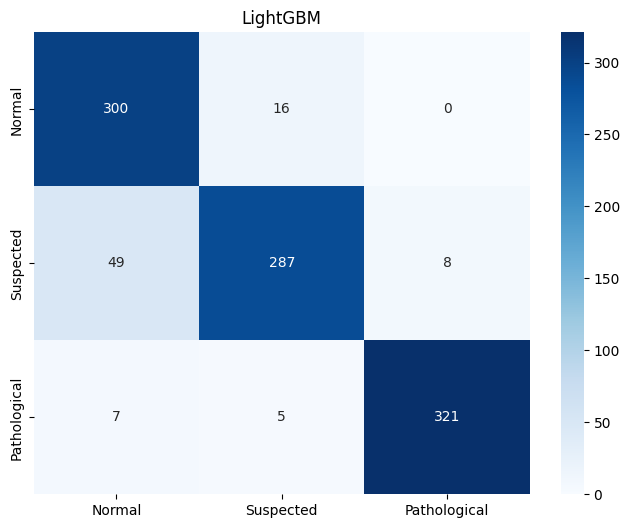

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
lgb_classifier = lgb.LGBMClassifier(random_state=30)
lgb_classifier.fit(X_train, y_train)
y_pred_lgb = lgb_classifier.predict(X_test)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"Accuracy of LightGBM Classifier: {accuracy_lgb * 100:.2f}%")

report = classification_report(y_test, y_pred,target_names=["Normal", "Suspected", "Pathological"])
print("Classification Report:\n", report)
labels = ["Normal", "Suspected", "Pathological"]
conf_matrix_11 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_11, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('LightGBM')
plt.show()

Accuracy of ExtraTreesClassifier: 98.49%
Classification Report:
               precision    recall  f1-score   support

      Normal       1.00      0.97      0.99       316
   Suspected       0.97      0.99      0.98       344
Pathological       0.99      0.99      0.99       333

    accuracy                           0.98       993
   macro avg       0.99      0.98      0.99       993
weighted avg       0.99      0.98      0.98       993



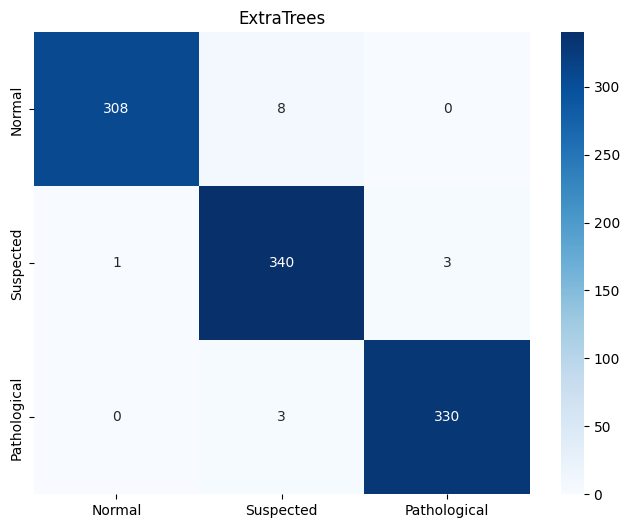

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix
extra_trees = ExtraTreesClassifier(random_state=30)
extra_trees.fit(X_train, y_train)
y_pred = extra_trees.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of ExtraTreesClassifier: {accuracy * 100:.2f}%")
report = classification_report(y_test, y_pred,target_names=["Normal", "Suspected", "Pathological"])
print("Classification Report:\n", report)
labels = ["Normal", "Suspected", "Pathological"]
conf_matrix_12 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_12, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('ExtraTrees')
plt.show()

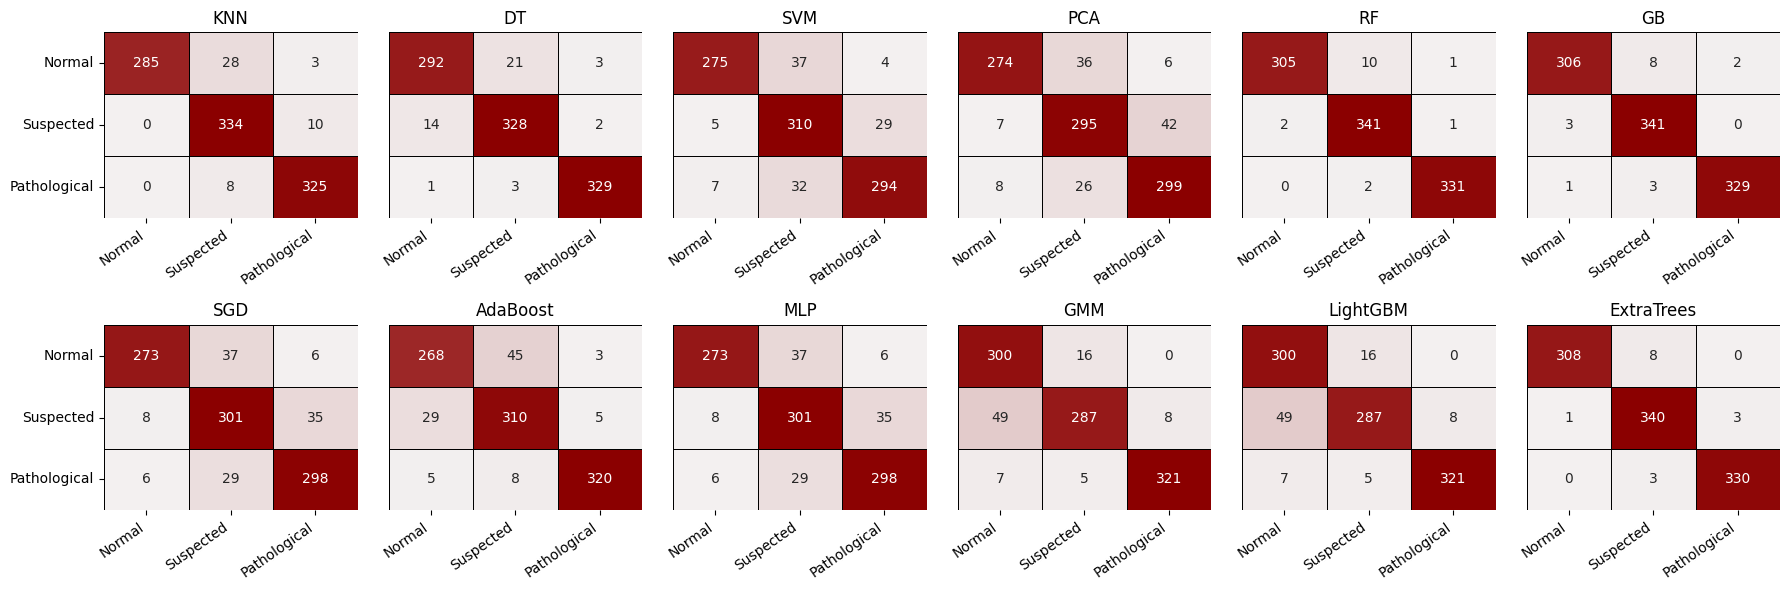

In [ ]:
fig, axes = plt.subplots(2, 6, figsize=(18, 6))

# List of classifiers and their respective confusion matrices
classifiers = ["KNN", "DT", "SVM", "PCA", "RF", "GB", "SGD","AdaBoost","MLP","GMM","LightGBM","ExtraTrees",]
confusion_matrices = [conf_matrix_1, conf_matrix_2, conf_matrix_3, conf_matrix_4, conf_matrix_5, conf_matrix_6, conf_matrix_7,conf_matrix_8,conf_matrix_9, conf_matrix_10, conf_matrix_11,conf_matrix_12]

cmap = sns.light_palette("darkred", as_cmap=True)

for i, ax in enumerate(axes.flatten()):
    # Plot y labels only for the first matrix in each row
    if i == 0 or i==6:
        sns.heatmap(confusion_matrices[i], annot=True, fmt='d', xticklabels=labels, yticklabels=labels,cmap=cmap, linewidths=.6, linecolor='black', ax=ax,cbar=False)
    else:
        sns.heatmap(confusion_matrices[i], annot=True, fmt='d',cmap=cmap, linewidths=.6, linecolor='black', xticklabels=labels ,yticklabels=False, ax=ax,cbar=False)

    ax.set_title(classifiers[i])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right')


# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
# Define the class labels explicitly
class_labels = [0, 1, 2]

y_test = [label - 1 for label in y_test]
# Create and train the XGBoost classifier with class labels
xgboost_classifier = XGBClassifier(num_class=len(class_labels))
xgboost_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgboost = xgboost_classifier.predict(X_test)
y_pred_xgboost = [label - 1 for label in y_pred_xgboost]

# Calculate accuracy
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
print(f"Accuracy of XGBoost Classifier: {accuracy_xgboost * 100}")

# Generate a classification report
report_xgboost = classification_report(y_test, y_pred_xgboost, target_names=["Normal", "Suspected", "Pathological"])
print("Classification Report:\n", report_xgboost)
labels = ["Normal", "Suspected", "Pathological"]
conf_matrix_xgboost = confusion_matrix(y_test, y_pred_xgboost)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgboost, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('XGBoost')
plt.show()

ValueError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_classifier.fit(X_train_scaled, y_train)
y_pred = mlp_classifier.predict(X_test_scaled)

print(f"Accuracy of MLP: {accuracy_score(y_test,y_pred)*100}")

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import *
pycaret_automl = setup(data=df, target = 'fetal_health', session_id=42)

In [ ]:
compare_models()